In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [3]:
image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3
input_path = './../gtsrb-german-traffic-sign/'

for i in range(total_classes):
    path = input_path + 'Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

#Converting lists into numpy arrays
#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)


./gtsrb-german-traffic-sign/Train/0
./gtsrb-german-traffic-sign/Train/1
./gtsrb-german-traffic-sign/Train/2
./gtsrb-german-traffic-sign/Train/3
./gtsrb-german-traffic-sign/Train/4
./gtsrb-german-traffic-sign/Train/5
./gtsrb-german-traffic-sign/Train/6
./gtsrb-german-traffic-sign/Train/7
./gtsrb-german-traffic-sign/Train/8
./gtsrb-german-traffic-sign/Train/9
./gtsrb-german-traffic-sign/Train/10
./gtsrb-german-traffic-sign/Train/11
./gtsrb-german-traffic-sign/Train/12
./gtsrb-german-traffic-sign/Train/13
./gtsrb-german-traffic-sign/Train/14
./gtsrb-german-traffic-sign/Train/15
./gtsrb-german-traffic-sign/Train/16
./gtsrb-german-traffic-sign/Train/17
./gtsrb-german-traffic-sign/Train/18
./gtsrb-german-traffic-sign/Train/19
./gtsrb-german-traffic-sign/Train/20
./gtsrb-german-traffic-sign/Train/21
./gtsrb-german-traffic-sign/Train/22
./gtsrb-german-traffic-sign/Train/23
./gtsrb-german-traffic-sign/Train/24
./gtsrb-german-traffic-sign/Train/25
./gtsrb-german-traffic-sign/Train/26
./gtsrb-ger

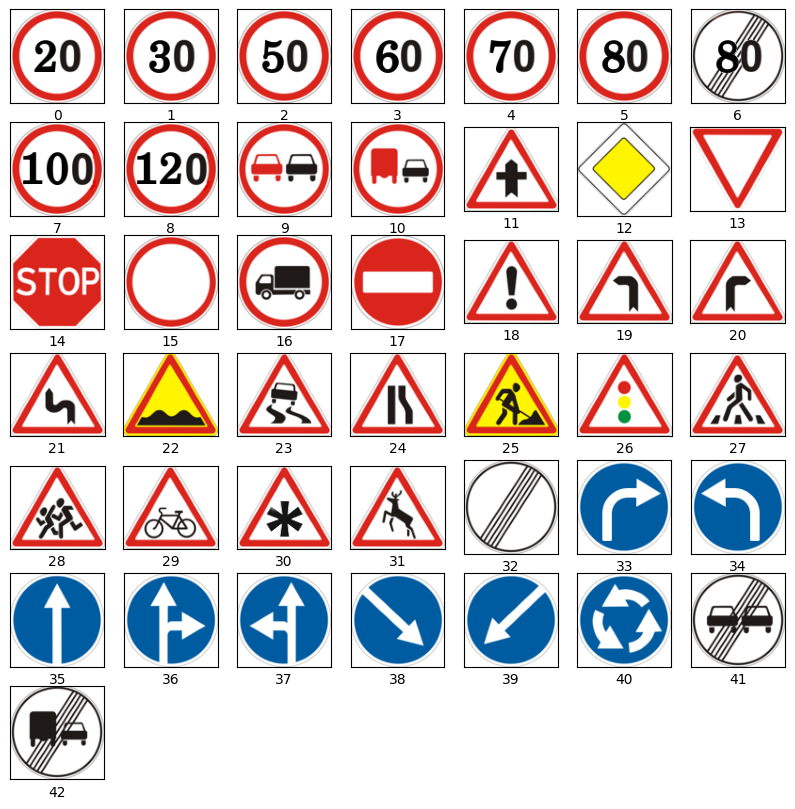

In [4]:
dir = './../gtsrb-german-traffic-sign/'
    
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [5]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 64, 64, 3)
X_valid.shape (7842, 64, 64, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [7]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [10]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
learning_rate = 0.0001

def results(model):
  adam = Adam(lr=learning_rate)

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

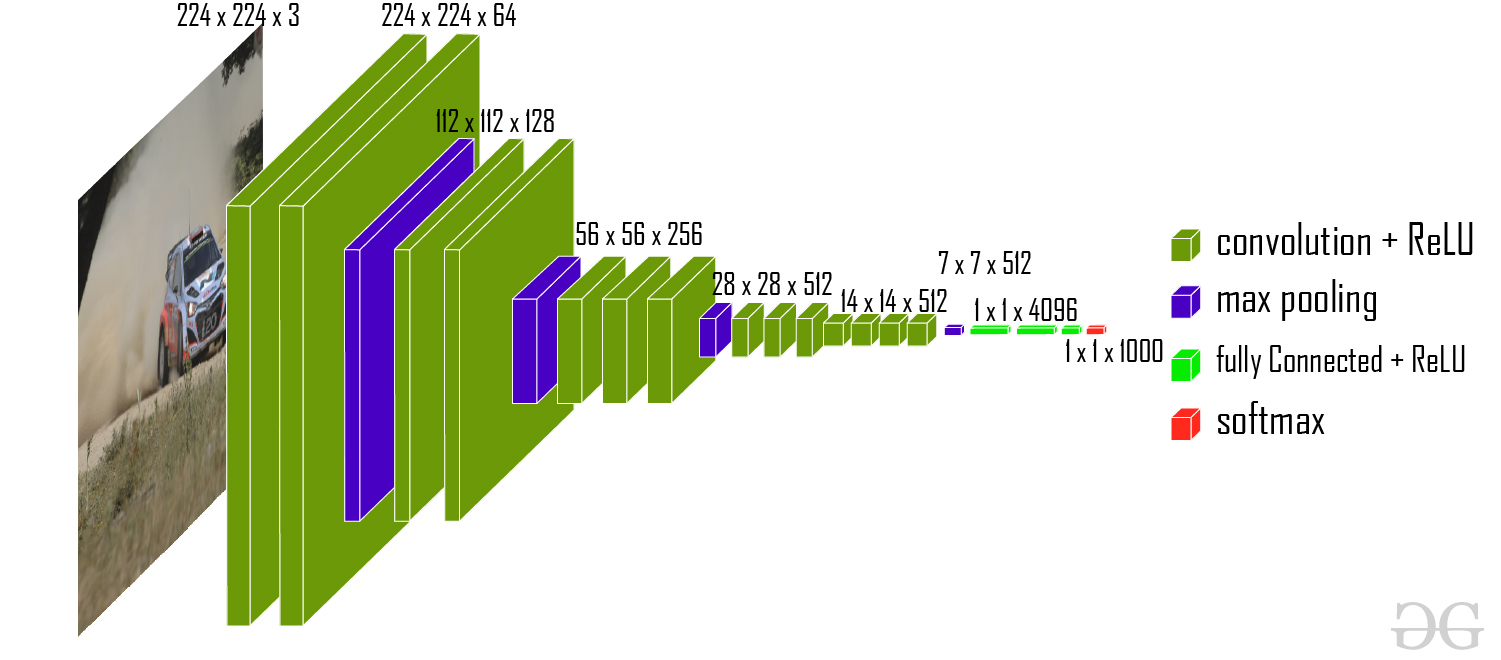

In [11]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/5
246/246 [==============================] - 421s 2s/step - loss: 1.2652 - accuracy: 0.6213 - val_loss: 0.7980 - val_accuracy: 0.7512
Epoch 2/5
246/246 [==============================] - 414s 2s/step - loss: 0.5883 - accuracy: 0.8221 - val_loss: 0.6063 - val_accuracy: 0.7935
Epoch 3/5
246/246 [==============================] - 464s 2s/step - loss: 0.3962 - accuracy: 0.8808 - val_loss: 0.3809 - val_accuracy: 0.8833
Epoch 4/5
246/246 [==============================] - 422s 2s/step - loss: 0.2884 - accuracy: 0.9154 - val_loss: 0.2987 - val_accuracy: 0.9104
Epoch 5/5
246/246 [==============================] - 434s 2s/step - loss: 0.2106 - accuracy: 0.9404 - val_loss: 0.2644 - val_accuracy: 0.9195


In [17]:
model.save('vgg16_transferlearning_tf.h5')

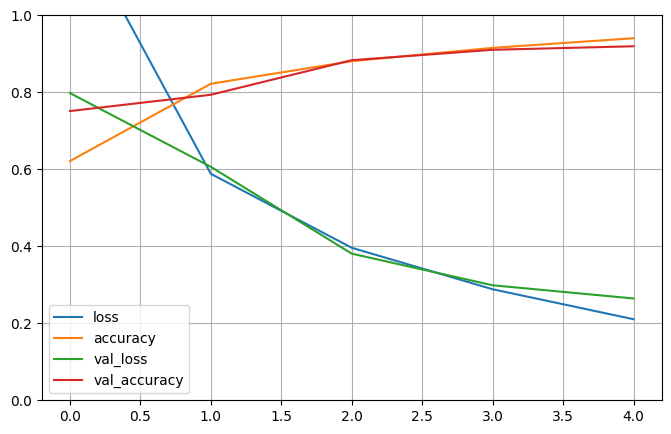

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [13]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [14]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [15]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 114ms/step


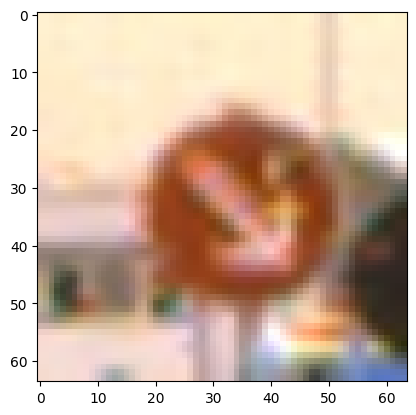

In [34]:
from keras.models import load_model


loaded_model = load_model('vgg16_transferlearning_tf.h5')

print(X_valid[0].shape)
# Now you can use this model for prediction
a = np.expand_dims(X_valid[0], axis=0)
print(a.shape)
prediction = loaded_model.predict(a)
prediction.argmax() , y_valid[0].argmax()


plt.imshow(X_valid[0])